<a href="https://colab.research.google.com/github/mwchuchu/EDA/blob/main/DH_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important Libraries.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading Dataset.

In [3]:
df = pd.read_csv("hf://datasets/scikit-learn/breast-cancer-wisconsin/breast_cancer.csv")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#Cleaning of Data.

In [5]:

df=df.drop(['compactness_mean','concavity_mean','concave points_mean','texture_worst','perimeter_worst','area_worst',],axis=1)


##Filtered data set:

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,symmetry_se,fractal_dimension_se,radius_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.2419,0.07871,1.0950,...,0.03003,0.006193,25.38,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.1812,0.05667,0.5435,...,0.01389,0.003532,24.99,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.2069,0.05999,0.7456,...,0.02250,0.004571,23.57,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2597,0.09744,0.4956,...,0.05963,0.009208,14.91,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.1809,0.05883,0.7572,...,0.01756,0.005115,22.54,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##More Cleaning:

In [8]:
df=df.drop(['fractal_dimension_mean'],axis=1)

In [9]:
df=df.drop(['concave points_worst','symmetry_worst','fractal_dimension_worst','radius_se','fractal_dimension_se','radius_worst','smoothness_worst','concavity_worst'],axis=1)

###More Filtered dataset:

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,symmetry_mean,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,compactness_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.2419,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.6656,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.1812,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.1866,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.2069,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.4245,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.2597,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.8663,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.1809,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.2050,NaN


#Visualization

##Data set visualization1:

Text(0.5, 1.0, 'Diagnosis')

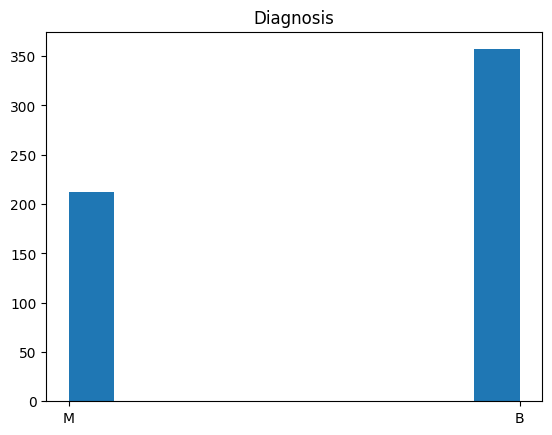

In [11]:

fig,ax=plt.subplots(1,1)
ax.hist(df['diagnosis'])
ax.set_title("Diagnosis")

##Data set visualization2:

Text(0, 0.5, 'Diagnosis.')

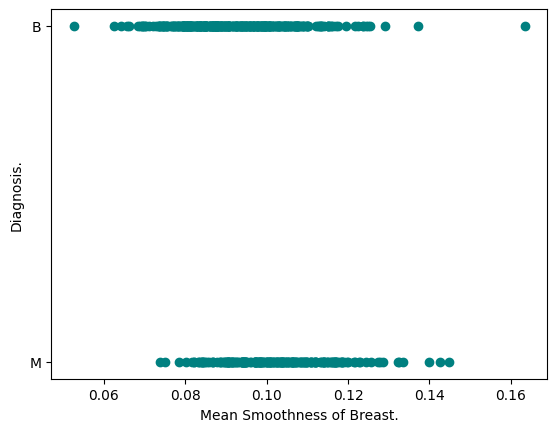

In [12]:

fig,ax=plt.subplots(1,1)
ax.scatter(df['smoothness_mean'],df['diagnosis'],color='teal')
ax.set_xlabel("Mean Smoothness of Breast.")
ax.set_ylabel("Diagnosis.")


##Data set visualization3:

Text(0, 0.5, 'Diagnosis.')

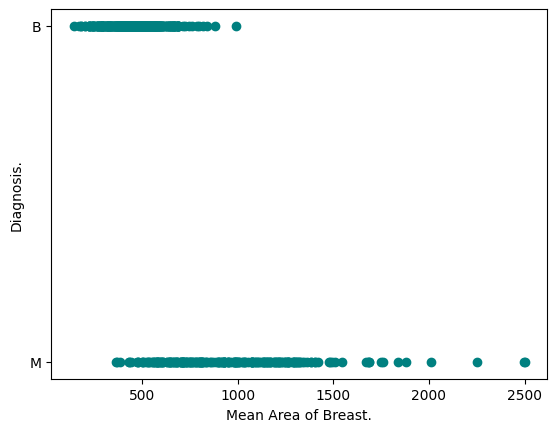

In [13]:
plt.scatter(df['area_mean'],df['diagnosis'],color='teal')
plt.xlabel("Mean Area of Breast.")
plt.ylabel("Diagnosis.")